In [138]:
import wbdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

#matplotlib and related imports
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.patches import Patch
import matplotlib.patches as patches

from scipy.spatial import ConvexHull
from scipy.signal import find_peaks
from scipy.stats import sem
import scipy.cluster.hierarchy as shc

In [3]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  24  Poverty and Equity
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclus

In [4]:
wbdata.get_indicator(source=46)

id                        name
------------------------  --------------------------------------------------------------------------------------------------------------------------------------------
AG.LND.FRST.K2            Forest area (sq. km)
AG.LND.FRST.ZS            Forest area (% of land area)
AG.YLD.CREL.KG            Cereal yield (kg per hectare)
BX.KLT.DINV.CD.WD         Foreign direct investment, net inflows (BoP, current US$)
BX.KLT.DINV.WD.GD.ZS      Foreign direct investment, net inflows (% of GDP)
BX.TRF.PWKR.DT.GD.ZS      Personal remittances, received (% of GDP)
DT.ODA.ALLD.CD            Net official development assistance and official aid received (current US$)
DT.ODA.ODAT.CD            Net official development assistance received (current US$)
DT.ODA.ODAT.CD1           Net official development assistance received (current US$)
DT.ODA.ODAT.KD            Net official development assistance received (constant 2015 US$)
DT.TDS.DPPF.XP.ZS         Debt service (PPG and IMF o

In [225]:
df = wbdata.get_dataframe({"SH.STA.SMSS.ZS":"Sanitation Access"}, country='all', data_date=None, freq='Y', source=None, convert_date=False, keep_levels=False, cache=True)

In [226]:
df = df.reset_index()

In [227]:
df_pivot = df.pivot(index='date', columns='country', values='Sanitation Access')

In [228]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1960 to 2020
Columns: 264 entries, Afghanistan to Zimbabwe
dtypes: float64(264)
memory usage: 126.3+ KB


In [243]:
set(df_pivot)

{'Albania',
 'Algeria',
 'Andorra',
 'Arab World',
 'Armenia',
 'Australia',
 'Austria',
 'Bahrain',
 'Belarus',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Central Europe and the Baltics',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Ecuador',
 'Egypt, Arab Rep.',
 'Estonia',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Greenland',
 'High income',
 'Hong Kong SAR, China',
 'Hungary',
 'Iceland',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Korea, Rep.',
 'Kuwait',
 'Lao PDR',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America 

In [234]:
df_pivot = df_pivot.dropna(axis=[0,1], how="all")

/Users/nn2tf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [235]:
df_pivot = df_pivot.reset_index()

In [236]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 118 entries, index to World
dtypes: float64(116), int64(1), object(1)
memory usage: 16.7+ KB


# Preparing Plot

(0, 100)

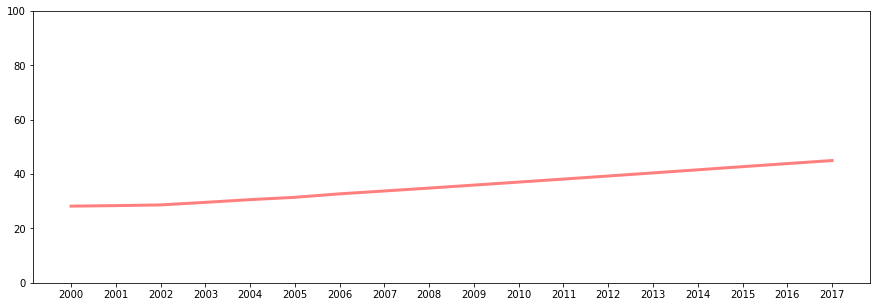

In [240]:

# prepare the data for plotting
# separate x and y variables

x = df_pivot['date']
y1 = df_pivot['World']
y2 = df_pivot['Upper middle income']
y3 = df_pivot['High income']
# instanciate the figure
fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()
# plot the data
ax.plot(x,y, color = "red", alpha = 0.5, lw = 3, label = "World")
ax.plot(x,y, color = "red", alpha = 0.5, lw = 3, label = "World")
#prettify the plot
# change the x and y limit
plt.ylim(0, 100)

